In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Betriebliche Finanzwirtschaft

# Drei Aufgaben des Finanzmanagers
### Regel 2: cashflows in die Zukungft verschieben

In [2]:
# Wird ein Cashflow in die Zukunft verschoben, muss er aufgezinst werden.

# Beispiel: Wir besitzen 1.000 EUR und möchten den gleichwertigen Betrag
# in einem Jahr bestimmen. Der aktuelle Marktzinssatz betägt 10%.
# Bir yıl sonraki değeri nedir?

In [3]:
# Wir können CFx(1+r)^n Formel nutzen um zukunftige Werte zu kalkulieren.
# Dieser Ansatz wird als "Aufzinsen" bezeichnet.
def aufzinsen(CF, r, n):
    """ CF*(1+r)^n """
    return CF*((1+r)**n)    

In [4]:
aufzinsen(1000, 0.1, 1)

1100.0

In [5]:
aufzinsen(1000, 0.1, 3)

1331.0000000000005

In [6]:
aufzinsen(1000, 0.1, 50)

117390.85287969578

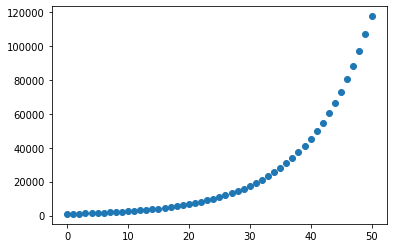

In [7]:
y_axis = []
for y in range(51):
    y_axis.append(aufzinsen(1000, 0.1, y))
    y_axis
x_axis = []
for x in range(51):
    x_axis.append(x)
plt.scatter(x_axis, y_axis)

### Regel 3: Cashflows in die Vergangenheit schieben

In [8]:
# Ein Cashflow muss zur Verschiebung in die Vergangenheit diskontiert werden.
# Beispiel: wir möchten den heutigen von 1.000 EUR ermitteln, die wir in einem
# Jahr erhalten (Zins: 10%).
# Bir yıl önceki değeri nedir?
def abzinsen(CF, r, n):
    """ CF/(1+r)^n """
    return CF/(1+r)**n

In [9]:
abzinsen(1000, 0.1, 1)

909.090909090909

In [10]:
abzinsen(1000, 0.1, 3)

751.3148009015775

In [11]:
abzinsen(1000, 0.1, 50)

8.518551279500606

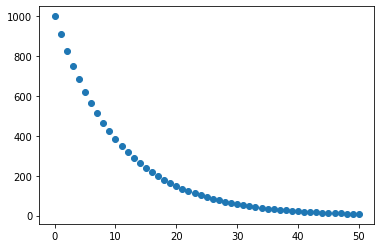

In [12]:
y_axis = []
for y in range(51):
    y_axis.append(abzinsen(1000, 0.1, y))
x_axis = []
for x in range(51):
    x_axis.append(x)
plt.scatter(x_axis, y_axis)

In [13]:
def kapitalwert_methode(CF, C, r, n):
    summe = []
    for cn in range(n+1):
        if(cn==0):
            summe.append(-abzinsen(CF,r,cn))
        else:
            summe.append(abzinsen(C,r,cn))
    return sum(summe)

kapitalwert_methode(1000,100,0.1,4)

-683.0134553650707

In [14]:
Frage_Deneme= -abzinsen(1000, 0.1, 0)+ abzinsen(100, 0.1, 1)+ abzinsen(100, 0.1, 2)+ abzinsen(100, 0.1, 3)+ abzinsen(100, 0.1, 4)
Frage_Deneme

-683.0134553650707

### Aufgabe 1

Sie arbeiten für Real Madrid (den Fußballverein) und sind dort als Finanzmanager angestellt. Im Rahmen Ihrer
Aufgabe sollen Sie den folgenden Transfer beurteilen:

- Sie können Hugo Mania – einen 17-jähriges Supertalent – heute für 2m EUR verpflichten
- Die Verpflichtung wird sicher (unrealistisch!) zu Trikotverkäufen von  zusätzlich 750k EUR in den kommenden 4 Jahren führen (jeweils am Ende des Jahres).
- Der Zinssatz beträgt 10%.

<b>Frage:</b> Was ist der NPV der Investition?

In [15]:
Frage_1 = -2000000 + abzinsen(750000, 0.1, 1) + abzinsen(750000, 0.1, 2) + abzinsen(750000, 0.1, 3) + abzinsen(750000, 0.1, 4)
print(Frage_1)

377399.0847619692


### Ewige Rente

In [16]:
# Wert der diskontierten Cashflows wird im Zeitverlauf immer geringer.
# Beitrag der Cashflows irgendwann vernachlässigbar.

<b>Annahme: </b>
- Cashflow: 1.000 EUR in die Ewigkeit
- Zinsen: 10%

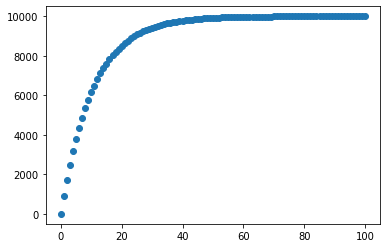

In [17]:
yy_axis = []
y_axis = []
x_axis = []
for y in range(1,102):
    summe = sum(yy_axis)
    y_axis.append(summe)
    yy_axis = []
    for yy in range(y):
        yy_axis.append(abzinsen(1000, 0.1, yy+1))
for x in range(101):
    x_axis.append(x)
plt.scatter(x_axis, y_axis)

In [18]:
# y_axis

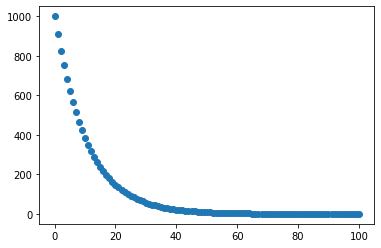

In [19]:
y_axis = []
x_axis = []
for y in range(0,101):
    y_axis.append(abzinsen(1000, 0.1, y))
for x in range(101):
    x_axis.append(x)
plt.scatter(x_axis, y_axis)

In [20]:
# y_axis

In [21]:
# Formel zur Berechnung einer ewigen Rente 

def ewige_rente(CF, r):
    """" CF/r """
    return CF/r


In [22]:
ewige_rente(1000, 0.1)

10000.0

#### Intuition

- Nehmen wir an, wir könnten 5% Zinsen auf 100 EUR verdienen, wenn wir diese in ein Bankkonto einzahlen
- Jedes Jahr könnten wir demnach 5 EUR an Verzinsung verdienen
- Nehmen wir an, dass wir die 5 EUR Zinsen abheben und die 100 EUR im Konto behalten
- Wir könnten dann nächstes Jahr wieder 5 EUR verdienen, 100 EUR auf dem Konto belassen usw.
- Wir hätten durch die Anlage von 100 EUR eine ewige Rente von 5 EUR abgebildet.
- Der Preis für diesen ewigen Cashflow von 5 EUR betrug in diesem Fall der Anlage (= 100 EUR).

<b>Allgemeiner ausgedrückt:</b> der ewige Cashflow einer Investition beträgt

<b>P = </b>initiale Investition
<b>r = </b>Zinsen auf die initiale Investition

In [23]:
def intuition(P, r):
    return r*P

<b>Barwert der Investition:</b>

In [24]:
def barwert_investition(CF, r):
    return CF/r

In [25]:
C = intuition(10000, 0.1)
C

1000.0

In [26]:
barwert_investition(C, 0.1)

10000.0

### Geometrisch wachsende Ewige Rente
Eine geometrisch wachsende ewige Rente ist ein Strom von Zahlungen, die für immer in regelmäßigen Abständen auftreten und mit einer konstanten Rate wachsen.

Beispiel für Anwendung:

- Endwert einer Unternehmensbewertung

<b>Illustration:</b> Zeitstrahl einer ewigen Rente von 100 USD mit einem Wachstum von 3% und Zinssatz beträgt %10.

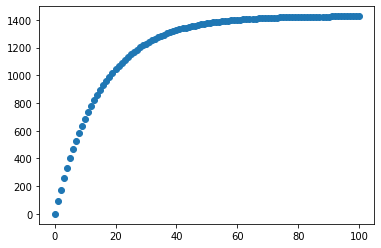

In [27]:
yy_axis = []
y_axis = []
x_axis = []
for y in range(1,102):
    summe = sum(yy_axis)
    y_axis.append(summe)
    yy_axis = []
    for yy in range(y):
        yy_axis.append(abzinsen(aufzinsen(100,0.03,yy), 0.1, yy+1))
for x in range(101):
    x_axis.append(x)
plt.scatter(x_axis, y_axis)

In [28]:
# y_axis

In [29]:
def wachsende_ewige_rente(CF,r,g):
    """CF/(r-g)"""
    return CF/(r-g)

In [30]:
wachsende_ewige_rente(100, 0.1, 0.03)

1428.5714285714284

### Aufgabe 2

Eine Bank bietet die folgende Investitionsmöglichkeit:
- Sie zahlt Ihnen 5.000 EUR p.a. für die Jahre 1 bis 3
- danach zahlt Sie Ihnen 1.000 EUR p.a. für eine unbegrenzte Zeit

Die Bank möchte für diese Investitionsmöglichkeit 25.000 EUR von Ihnen. Der Zinssatz beträgt 10%. Würden Sie die Investition tätigen?

Wie würde sich der Barwert der Investitionsmöglichkeit ändern, sofern die o.g. 1.000 EUR jedes Jahr um 5% wachsen würden?

In [31]:
Frage_2_1 = kapitalwert_methode(25000,5000,0.1,3)+ abzinsen(ewige_rente(1000, 0.1), 0.1, 3)
Frage_2_1

-5052.592036063116

In [32]:
Frage_2_2= kapitalwert_methode(25000,5000,0.1,3)+ abzinsen(wachsende_ewige_rente(1000, 0.1, 0.05), 0.1, 3)
Frage_2_2

2460.5559729526594

## Annuitäten

Eine Annuität ist ein Strom von N gleichen Cashflows, die in regelmäßigen Abständen bezahlt werden.

Beispiele für Anwendungen
- Kredit für Auto
- Immobilienkredit
- Anleihe

In [33]:
def annuität(C, r, n):
    return  (C/r)*(1-(1/(1+r)**n))

In [34]:
annuität(100,0.05,20)

1246.2210342539993

In [35]:
kapitalwert_methode(0,100,0.05,20)

1246.2210342539981

### Aufgabe 3

Sie gewinnen im Lotto und erhalten den Jackpot von 30m EUR. Die Lotterie gewährt Ihnen zwei
Auszahlungsoptionen:
- Sie erhalten 30 Zahlungen von 1m EUR p.a. (die erste Zahlung erhalten Sie heute)
- Sie erhalten heute 15m EUR

Der Zinssatz beträgt 10%.

Welche Option wählen Sie?

In [36]:
Frage_3_1 =abzinsen(15000000, 0.1,0)- annuität(1000000,0.1,30)
Frage_3_1

5573085.533011679

In [37]:
# Man muss zweite Option wählen.

### Aufgabe 4

Sie sind ziemlich risikoavers und haben Sorge, dass Ihre Rente nicht genug sein könnte, um Ihren Lebensstandard zu halten. Sie beginnen deshalb heute, im Alter von 25 Jahren, 5.000 EUR p.a. in ein Sparbuch einzulegen.

- Wenn der Zinssatz für Sparen bei 5% p.a. läge, wieviel hätten Sie mit 65 Jahren erspart?

In [38]:
Erste_Schnitt = annuität(5000, 0.05, 40)
aufzinsen(Erste_Schnitt, 0.05, 40)

603998.8712124659

### Geometrisch wachsende Annuität

Ist ein Strom von N in regelmäßigen Abständen gezahlten, geometrisch wachsenden Cashflows

In [39]:
def wachsende_annuität(C,r,g,n):
    return (C/(r-g))*(1-(((1+g)/(1+r))**n))

In [40]:
wachsende_annuität(5000, 0.05, 0, 40)

85795.43176997225

### Aufgabe 5

Sie wollen ein Haus kaufen, welches 500.000 EUR kostet. Leider haben Sie nur 100.000 EUR und müssen den
restlichen Betrag via Immobilienkredit bei einer Bank finanzieren. Die Bank bietet Ihnen folgende Konditionen:

- Laufzeit: 30 Jahre
- Zinssatz: 2%
- Zins und Tilgung: jährlich

<b>Frage:</b> Was ist die jährliche Zahlung an Ihre Bank?

In [41]:
Aufgabe_5_C = 400000/((1/0.02)*(1-(1/(1.02)**30)))
Aufgabe_5_C

17859.968917361173

In [42]:
Check = annuität(Aufgabe_5_C,0.02,30)
Check

400000.0

Nach Ihrem Studium an der TAU gründen Sie ein erfolgreiches Unternehmen und
verdienen sehr viel Geld. Aus Dankbarkeit für die gute Ausbildung, entscheiden Sie sich etwas von Ihrem Geld zurückzugeben. Konkret entschließen Sie sich alle vier Jahre 2.5 Millionen TYR zu spenden. Von jetzt an werden Sie alle vier Jahre 2.5 Millionen TYR spenden.Nehmen Sie an, dass der effektive Jahreszins bei 5 % liegt.

In [43]:
abzinsen(2.5,0.05,0)+abzinsen(2.5,0.05,1)+abzinsen(2.5,0.05,2)+abzinsen(2.5,0.05,3)+abzinsen(2.5,0.05,4)

11.3648762604059

Ihr Unternehmen kann eine Maschine kaufen, die zu Kosteneinsparungen von 1.000 EUR am Ende des ersten Jahres führt. Danach werden die Kosteneinsparungen um jährlich zusätzlich um 2 % ansteigen. Der risikofreie Zinssatz liegt bei 5 %.

In [44]:
abzinsen(1000,0.5,1)+wachsende_ewige_rente(1000,0.05,0.02)

33999.99999999999

Sie haben eine Firma, die in einem Jahr 1m EUR an Cashflows generiert hat. Sie treffen nun folgende Annahmen:

- der Cashflow der Firma wird für die nächsten 5 Jahre um jährlich 30 % wachsen
- der Cashflow der Firma wird nach den 5 Jahren nur noch um jährlich 3 % wachsen; dies gilt für die Ewigkeit.

Unter der Annahme, dass der Zinssatz 8 % beträgt.

In [45]:
abzinsen(1000000,0.08,0)+abzinsen(aufzinsen(1000000,0.3,0),0.08,1)+abzinsen(aufzinsen(1000000,0.3,1),0.08,2)+abzinsen(aufzinsen(1000000,0.3,2),0.08,3)+abzinsen(aufzinsen(1000000,0.3,3),0.08,4)+abzinsen(aufzinsen(1000000,0.3,4),0.08,5)+abzinsen(wachsende_ewige_rente(aufzinsen(1000000,0.3,4),0.08,0.03),0.08,5)

46816990.516246274

Sie sehen folgende Werbung Ihrer Bank “Für eine einmalige Einzahlung von 30.000 EUR werden Sie von uns jährlich 2.000 EUR erhalten”. In der Detailbeschreibung erfahren Sie, dass die 2.000 EUR jährlich am Ende des Jahres gezahlt werden. Einen Auszahlungsstop gibt es auch dann nicht, wenn Sie sterben. Die Zahlung würde quasi für Ihre Erben weitergehen. Der risikofreie Zinssatz liegt bei 4 %.

In [46]:
-30000+ewige_rente(2000,0.4)

-25000.0

161.05100000000004